# Simple Examples for Using SpecDB (v1.3)

## Examples are with IGMSpec

In [1]:
%matplotlib inline

In [2]:
# import
from astropy import units as u

from specdb import query_catalog as spqcat
from specdb import interface_db as spgidb
from specdb import utils as spdbu
from specdb.specdb import SpecDB

from pyigm.surveys.llssurvey import LLSSurvey

## Setup Class

In [3]:
igmsp = SpecDB(db_file='/raid/IGMSPEC_DB/IGMspec_DB_v02.hdf5')

In [4]:
igmsp.qcat

<QueryCatalog:  Catalog has 403265 sources
   Loaded groups are [u'BOSS_DR12', u'HSTQSO', u'SDSS_DR7', u'KODIAQ_DR1', u'MUSoDLA', u'HD-LLS_DR1', u'2QZ', u'ESI_DLA', u'HDLA100', u'GGG', u'COS-Halos', u'HST_z2', u'COS-Dwarfs', u'XQ-100'] 
>

In [5]:
igmsp.idb

AttributeError: 'SpecDB' object has no attribute 'idb'

In [6]:
meta = igmsp['ESI_DLA'].meta

In [7]:
meta

Name,RA,DEC,Plate,MJD,FiberID,zem,r_mag,i_mag,z_mag,ObsDate,Exptime,SN,Slit,Reference,DATE-OBS,sig_zem,flag_zem,EPOCH,IGM_ID,SPEC_FILE,NPIX,WV_MIN,WV_MAX,R,SURVEY_ID,TELESCOPE,INSTR,GRATING
str10,float64,float64,int64,int64,int64,float64,float64,float64,float64,str7,int64,int64,float64,str13,str10,float64,str4,float64,int64,str19,int64,float64,float64,float64,int64,str6,str3,str3
J0007+0041,1.9549,0.6888,4217,55478,800,4.830,21.36,19.95,19.83,8/11/13,1800,10,0.75,Rafelski:2014,2013-08-11,0.0,SDSS,2000.0,2256,J0007+0041a_xF.fits,27932,3993.5,10132.0,6060.0,0,KeckII,ESI,ECH
J0040-0915,10.2277,-9.2575,655,52162,482,5.000,20.48,19.18,19.1,1/20/10,2280,17,0.5,Rafelski:2012,2010-01-20,0.0,SDSS,2000.0,303533,J0040-0915a_xF.fits,27929,3993.1,10129.9,9090.0,1,KeckII,ESI,ECH
J0054-0109,13.5893,-1.1560,4224,55481,248,5.090,21.42,20.0,19.57,4/1/13,3600,15,0.75,Rafelski:2014,2013-04-01,0.0,SDSS,2000.0,14714,J0054-0109a_xF.fits,27931,3992.9,10129.9,6060.0,2,KeckII,ESI,ECH
J0210-0018,32.6798,-0.3051,702,52178,113,4.730,20.41,19.17,19.05,1/20/10,2880,11,0.5,Rafelski:2012,2010-01-20,0.0,SDSS,2000.0,32759,J0210-0018a_xF.fits,27929,3993.1,10129.9,9090.0,3,KeckII,ESI,ECH
J0231-0728,37.9069,-7.4818,4389,55539,679,5.420,21.54,19.48,19.11,4/1/13,5400,25,0.75,Rafelski:2014,2013-04-01,0.0,SDSS,2000.0,36770,J0231-0728a_xF.fits,27932,3992.9,10130.3,6060.0,4,KeckII,ESI,ECH
J0331-0741,52.8319,-7.6953,461,51910,209,4.720,20.57,19.1,19.08,1/20/10,4320,21,0.75,Rafelski:2012,2010-01-20,0.0,SDSS,2000.0,308849,J0331-0741a_xF.fits,27927,3993.4,10129.9,6060.0,5,KeckII,ESI,ECH
J0747+4434,116.9573,44.5714,3676,55186,596,4.440,19.6,19.52,19.27,3/22/09,3600,15,0.75,Rafelski:2012,2009-03-22,0.0,SDSS,2000.0,43726,J0747+4434a_xF.fits,27929,3993.1,10129.9,6060.0,6,KeckII,ESI,ECH
J0756+4104,119.0756,41.0691,3680,55210,366,5.100,21.79,20.2,19.88,4/1/13,1800,18,0.75,Rafelski:2014,2013-04-01,0.0,SDSS,2000.0,45533,J0756+4104a_xF.fits,27931,3993.4,10131.3,6060.0,7,KeckII,ESI,ECH
J0759+1800,119.7816,18.0152,4490,55629,74,4.870,21.03,19.16,19.13,1/20/10,4320,20,0.75,Rafelski:2012,2010-01-20,0.0,SDSS,2000.0,46195,J0759+1800a_xF.fits,27927,3993.7,10130.6,6060.0,8,KeckII,ESI,ECH


## Radial search

### Search around FJ0812+32

In [8]:
# Grab catalog ID for input coordinate -- All matching within tolerance are returned
ids0812 = igmsp.qcat.radial_search(('00:40:54.7','-09:15:27'), 1.*u.arcsec)
igmsp.qcat.show_cat(ids0812)

Your search yielded 1 match[es] within radius=1 arcsec
IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem  STYPE
------ -------- -------- ------ ----------- ------- ---------- -----
303533  10.2277  -9.2574  4.976       662.0   0.000              QSO
----------
Survey key:
    BOSS_DR12: 1
    HSTQSO: 4096
    SDSS_DR7: 2
    KODIAQ_DR1: 4
    MUSoDLA: 8192
    HD-LLS_DR1: 8
    2QZ: 256
    ESI_DLA: 512
    HDLA100: 128
    GGG: 16
    COS-Halos: 1024
    HST_z2: 32
    COS-Dwarfs: 2048
    XQ-100: 64


In [9]:
# Grab meta
meta0812 = igmsp['ESI_DLA'].cut_meta(ids0812)

In [10]:
meta0812

Name,RA,DEC,Plate,MJD,FiberID,zem,r_mag,i_mag,z_mag,ObsDate,Exptime,SN,Slit,Reference,DATE-OBS,sig_zem,flag_zem,EPOCH,IGM_ID,SPEC_FILE,NPIX,WV_MIN,WV_MAX,R,SURVEY_ID,TELESCOPE,INSTR,GRATING
str10,float64,float64,int64,int64,int64,float64,float64,float64,float64,str7,int64,int64,float64,str13,str10,float64,str4,float64,int64,str19,int64,float64,float64,float64,int64,str6,str3,str3
J0040-0915,10.2277,-9.2575,655,52162,482,5.000,20.48,19.18,19.1,1/20/10,2280,17,0.5,Rafelski:2012,2010-01-20,0.0,SDSS,2000.0,303533,J0040-0915a_xF.fits,27929,3993.1,10129.9,9090.0,1,KeckII,ESI,ECH


In [11]:
# Grab spectra
row = igmsp['ESI_DLA'].ids_to_firstrow(ids0812)
J0812spec, meta = igmsp['ESI_DLA'].grab_specmeta(row)

Staged 1 spectra totalling 0.0008 Gb
Loaded spectra


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:248: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


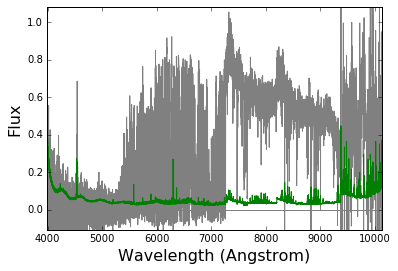

In [12]:
J0812spec.plot()

### Search around J233446.40-090812.3

In [13]:
ids2334 = igmsp.qcat.radial_search('J233446.40-090812.3', 1.*u.arcsec)
igmsp.qcat.show_cat(ids2334)

Your search yielded 1 match[es] within radius=1 arcsec
IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem  STYPE
------ -------- -------- ------ ----------- ------- ---------- -----
381590 353.6933  -9.1367  3.317      8206.0   0.000              QSO
----------
Survey key:
    BOSS_DR12: 1
    HSTQSO: 4096
    SDSS_DR7: 2
    KODIAQ_DR1: 4
    MUSoDLA: 8192
    HD-LLS_DR1: 8
    2QZ: 256
    ESI_DLA: 512
    HDLA100: 128
    GGG: 16
    COS-Halos: 1024
    HST_z2: 32
    COS-Dwarfs: 2048
    XQ-100: 64


In [14]:
# Grab all meta
meta2334 = igmsp['HD-LLS_DR1'].cut_meta(ids2334, first=False)

In [15]:
meta2334

Name,QSO,RA,DEC,zem,Z_LLS,logNHI,sig(logNHI) [2],SPEC_FILE,IGM_ID,EPOCH,NPIX,DATE-OBS,WV_MIN,WV_MAX,R,SURVEY_ID,GRATING,INSTR,TELESCOPE
str33,str19,float64,float64,float64,float64,float64,float64,str37,int64,float64,int64,str10,float64,float64,float64,int64,str4,str5,str13
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.6933,-9.1367,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_ESI.fits,381590,2000.0,33000,2002-12-02,0.0,10199.8,6000.0,139,ECH,ESI,Keck-II
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.6933,-9.1367,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_HIRES.fits,381590,2000.0,129277,2007-09-18,4064.6,7120.0,48000.0,140,BOTH,HIRES,Keck-I
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.6933,-9.1367,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_MAGE.fits,381590,2000.0,16580,2010-08-13,0.0,9284.6,5857.14285714,141,N/A,MagE,Magellan/Clay


In [16]:
# Grab all spectra
rows = igmsp['HD-LLS_DR1'].ids_to_allrows(ids2334)
J2334spec, meta_2334 = igmsp['HD-LLS_DR1'].grab_specmeta(rows)

Staged 3 spectra totalling 0.01008 Gb
Loaded spectra


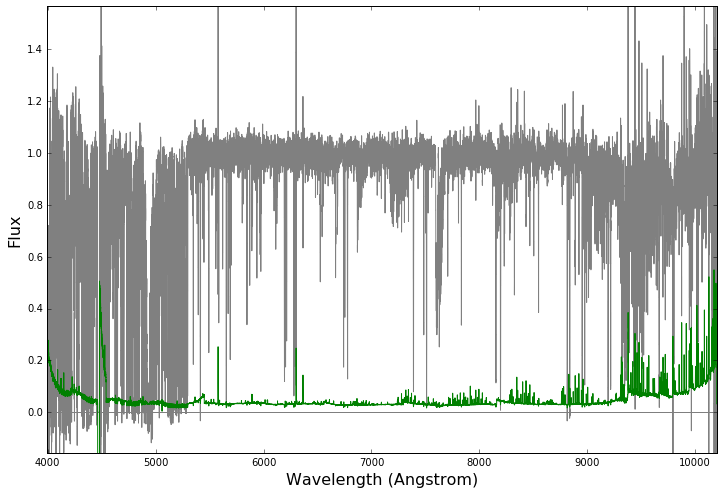

In [17]:
# Plot the first one (ESI)
J2334spec.plot(inline=True)

----

In [18]:
# Simpler approach
all_spec, all_meta = igmsp.allspec_at_coord('J233446.40-090812.3', igroup='HD-LLS_DR1')
J2334spec = all_spec[0]
J2334spec

Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 3 spectra totalling 0.01008 Gb
Loaded spectra


<XSpectrum1D: file=none, nspec=3, select=0, wvmin=3995.02 Angstrom, wvmax=10199.8 Angstrom>

In [19]:
all_meta[0]

Name,QSO,RA,DEC,zem,Z_LLS,logNHI,sig(logNHI) [2],SPEC_FILE,IGM_ID,EPOCH,NPIX,DATE-OBS,WV_MIN,WV_MAX,R,SURVEY_ID,GRATING,INSTR,TELESCOPE
str33,str19,float64,float64,float64,float64,float64,float64,str37,int64,float64,int64,str10,float64,float64,float64,int64,str4,str5,str13
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.6933,-9.1367,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_ESI.fits,381590,2000.0,33000,2002-12-02,0.0,10199.8,6000.0,139,ECH,ESI,Keck-II
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.6933,-9.1367,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_HIRES.fits,381590,2000.0,129277,2007-09-18,4064.6,7120.0,48000.0,140,BOTH,HIRES,Keck-I
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.6933,-9.1367,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_MAGE.fits,381590,2000.0,16580,2010-08-13,0.0,9284.6,5857.14285714,141,N/A,MagE,Magellan/Clay


## Simple catalog search

### LLS from SDSS_DR7 vs. IGMspec

In [20]:
sdss_dr7_all = LLSSurvey.load_SDSS_DR7(sample='all')
sdss_dr7_all

SDSS-DR7: Loading LLS file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_stat_LLS.fits.gz
SDSS-DR7: Loading QSOs file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_qsos_sn2050.fits.gz


<IGMSurvey: nsys=1935, type=LLS, ref=SDSS-DR7, nsightlines=3759>

In [21]:
# Grab the coord
lls_coord = sdss_dr7_all.coord
lls_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(339.61320833, 13.90905556), (160.36441667, 2.65569444),
     (167.247, 3.19108333), ..., (230.02470833, 23.66472222),
     (124.528625, 7.32227778), (150.86345833, 22.97005556)]>

In [23]:
# Match -- Sources that don't match are given a -1 ID
lls_ids = igmsp.qcat.match_coord(lls_coord)
lls_ids

Your search yielded 1931 matches from 1935 input coordinates


array([279049, 333498, 337018, ..., 238227,  52788,  96970])

In [24]:
# Show cat
igmsp.qcat.show_cat(lls_ids)

IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem  STYPE
------ -------- -------- ------ ----------- ------- ---------- -----
   881   0.7514  16.0077  3.662         3.0   0.002  BOSS_PCA    QSO
   897   0.7640 -10.8641  3.638         3.0   0.001  BOSS_PCA    QSO
  1680   1.4016  13.9971  3.709         3.0   0.002  BOSS_PCA    QSO
  2168   1.8785  16.1257  3.519         3.0   0.002  BOSS_PCA    QSO
  3247   2.8135  14.7672  4.986      8211.0   0.003  BOSS_PCA    QSO
  5191   4.5579  14.4155  4.216         3.0   0.001  BOSS_PCA    QSO
  5224   4.5863  14.3143  3.938         3.0   0.004  BOSS_PCA    QSO
  5481   4.8268  15.1032  4.145         3.0   0.003  BOSS_PCA    QSO
  5616   4.9586  -0.6780  4.319         3.0   0.010  BOSS_PCA    QSO
  5986   5.3335  15.8571  3.690         3.0   0.001  BOSS_PCA    QSO
   ...      ...      ...    ...         ...     ...        ...   ...
378846 326.8571  -8.6430  4.588        18.0   0.000              QSO
379101 329.9334  -8.2762  3.755   

In [26]:
# Grab GGG spec
lls_GGG_ids = igmsp.qcat.match_coord(lls_coord, group='GGG')
gdID = lls_GGG_ids >= 0
# Rows
rows = igmsp['GGG'].ids_to_allrows(lls_ids[gdID])
LLSspec, LLSmeta = igmsp['GGG'].grab_specmeta(rows)

Your search yielded 102 matches from 1935 input coordinates
Staged 172 spectra totalling 0.0044032 Gb
Loaded spectra


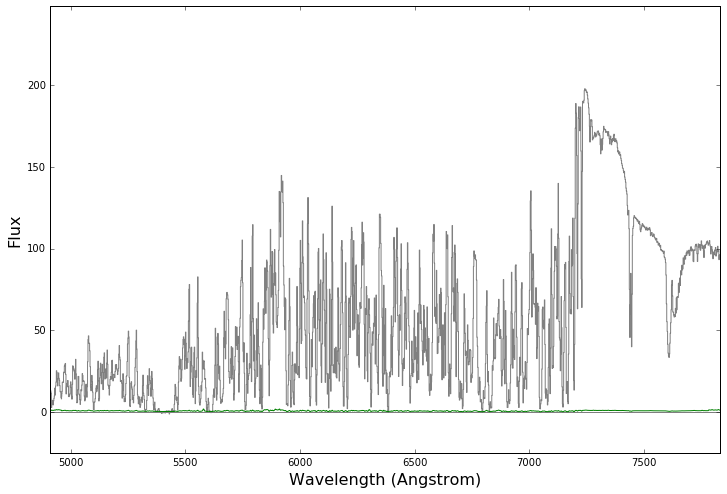

In [27]:
# Show the first spectrum
LLSspec.plot(inline=True)

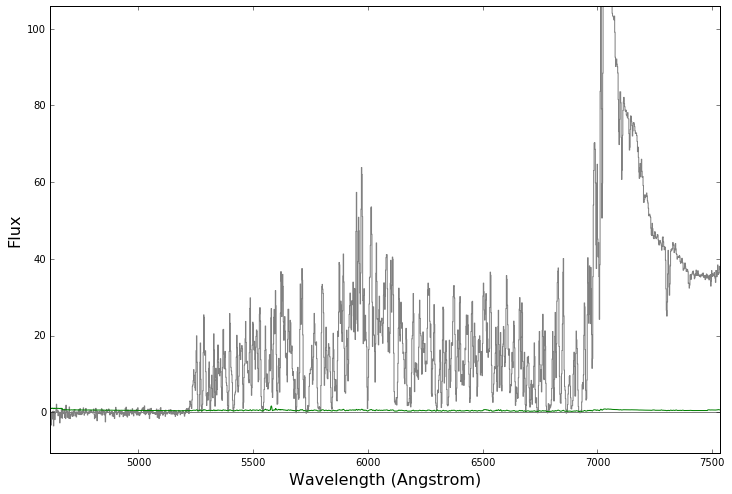

In [28]:
# Show the 10th spectrum
LLSspec.select=9
LLSspec.plot(inline=True)

----

## Time Evolution

In [30]:
ggg_kodiaq = igmsp.qcat.find_ids_in_groups(['GGG', 'KODIAQ_DR1'], in_all=True)

In [31]:
ids_time = igmsp.cat['IGM_ID'][ggg_kodiaq]
igmsp.qcat.show_cat(ids_time)

IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem  STYPE
------ -------- -------- ------ ----------- ------- ---------- -----
124507 165.1885  11.3775  4.725      8855.0   0.006  BOSS_PCA    QSO
153097 180.5324  32.5941  5.240       663.0  -1.000  BOSS_PCA    QSO
303533  10.2277  -9.2574  4.976       662.0   0.000              QSO
----------
Survey key:
    BOSS_DR12: 1
    HSTQSO: 4096
    SDSS_DR7: 2
    KODIAQ_DR1: 4
    MUSoDLA: 8192
    HD-LLS_DR1: 8
    2QZ: 256
    ESI_DLA: 512
    HDLA100: 128
    GGG: 16
    COS-Halos: 1024
    HST_z2: 32
    COS-Dwarfs: 2048
    XQ-100: 64


In [6]:
meta_time = igmsp.meta_list(['GGG','KODIAQ_DR1'], ids_time)

In [ ]:
spec_time = igmsp.spec_list(['GGG','SDSS_DR7'], ids_time)

In [25]:
spec_time

[<XSpectrum1D: file=none, nspec=3, select=0, wvmin=4630.86 Angstrom, wvmax=7558.37 Angstrom>,
 <XSpectrum1D: file=none, nspec=3, select=0, wvmin=3802.77 Angstrom, wvmax=9187.56 Angstrom>]

### Plot both

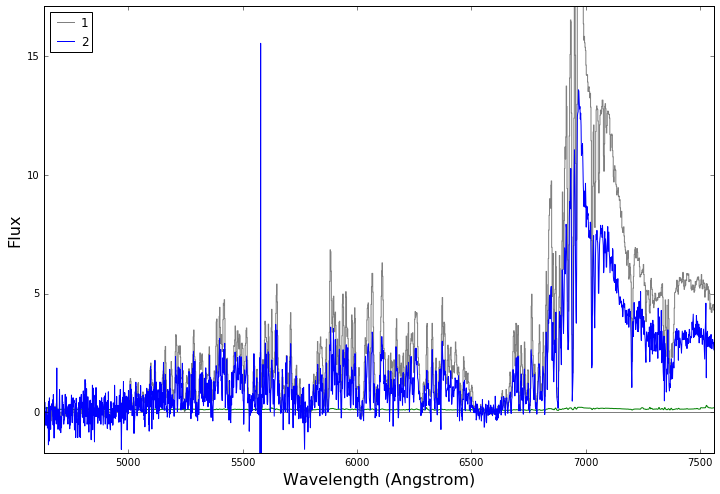

In [26]:
spec_time[0].plot(plot_two=spec_time[1],inline=True, scale_two=0.6)

----

## Pairs

### QPQ8 like

#### Query on separation (angular and redshift)

In [4]:
ID_fg, ID_bg = igmsp.pairs(30*u.arcsec, 3000.*u.km/u.s)

In [5]:
igmsp.show_cat(ID_fg)

IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem STYPE
------ -------- -------- ------ ----------- ------- --------- -----
   293   0.2461  28.3758  0.985         1.0  -1.000 BOSS_PCA    QSO
   434   0.3669   8.6782  2.794         1.0   0.003 BOSS_PCA    QSO
   851   0.7280  21.6517  1.877         1.0  -1.000 BOSS_PCA    QSO
  1006   0.8555  13.4381  0.628         1.0  -1.000 BOSS_PCA    QSO
  1638   1.3680  25.7650  2.545         1.0  -1.000 BOSS_PCA    QSO
  2490   2.1692  17.1640  1.380         1.0  -1.000 BOSS_PCA    QSO
  2748   2.3791  17.4591  0.665         1.0  -1.000 BOSS_PCA    QSO
  2830   2.4458  12.0703  2.254         1.0   0.002 BOSS_PCA    QSO
  2872   2.4857  26.2747  1.997         1.0   0.001 BOSS_PCA    QSO
  2940   2.5424  32.9975  2.043         1.0  -1.000 BOSS_PCA    QSO
   ...      ...      ...    ...         ...     ...       ...   ...
400308 341.2155 -30.1217  0.310       256.0   0.000       2QZ   QSO
400509 342.5932 -30.3432  0.596       256.0   0.

#### Check for high dispersion spectrum in b/g QSOs

In [8]:
highdisp = igmsp.ids_in_surveys(['HD-LLS_DR1', 'KODIAQ_DR1'], IDs=ID_bg)

IndexError: index 8340 is out of bounds for axis 1 with size 1416

In [34]:
igmsp.show_cat(ID_bg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem STYPE
------ -------- -------- ------ ----------- ------- -------- -----
382393  73.0567 -16.6700  2.684         4.0   0.000   SIMBAD   QSO
----------
Survey key:
    2QZ: 256
    BOSS_DR12: 1
    COS-Halos: 1024
    ESI_DLA: 512
    GGG: 16
    HD-LLS_DR1: 8
    HDLA100: 128
    HSTQSO: 4096
    HST_z2: 32
    KODIAQ_DR1: 4
    SDSS_DR7: 2
    XQ-100: 64


In [35]:
igmsp.show_cat(ID_fg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem STYPE
------ -------- -------- ------ ----------- ------- -------- -----
382577  73.0593 -16.6713  2.600      4096.0   0.000    UNKWN   QSO
----------
Survey key:
    2QZ: 256
    BOSS_DR12: 1
    COS-Halos: 1024
    ESI_DLA: 512
    GGG: 16
    HD-LLS_DR1: 8
    HDLA100: 128
    HSTQSO: 4096
    HST_z2: 32
    KODIAQ_DR1: 4
    SDSS_DR7: 2
    XQ-100: 64


In [10]:
x=3
'I {:s} to eat {:d} bananas'.format('like', x)

'I like to eat 3 bananas'